In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import dask
from dask.diagnostics import ProgressBar

# Read data files

In [2]:
!du -sh /n/scratchlfs/ac290r/p2_data_postprocess/*

45G	/n/scratchlfs/ac290r/p2_data_postprocess/re10_pe1
46G	/n/scratchlfs/ac290r/p2_data_postprocess/re10_pe10_wrong_boundary
46G	/n/scratchlfs/ac290r/p2_data_postprocess/re10_pe1_wrong_boundary
1.2G	/n/scratchlfs/ac290r/p2_data_postprocess/re10_pe3
18G	/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe1
18G	/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe10_wrong_pe
5.8G	/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe1_backup
14G	/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe3
4.0K	/n/scratchlfs/ac290r/p2_data_postprocess/README


In [3]:
!ls /n/scratchlfs/ac290r/p2_data_postprocess/re5_pe1/blood/ | head -n 5  # frequency

blood_00001000.nc
blood_00006000.nc
blood_00011000.nc
blood_00016000.nc
blood_00021000.nc


In [4]:
def add_time_label(ds, step=5000, offset=1000):
    '''
    ds: Xarray Dataset or DataArray, will be modified in-place
    '''
    ds.coords['time'] = np.arange(0, ds.sizes['time']) * step + offset

## Re = 5 cases

### Blood field re5

In [5]:
%time ds_re5pe1 = xr.open_mfdataset('/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe1/blood/blood_*.nc', concat_dim='time')
add_time_label(ds_re5pe1)

CPU times: user 8.91 s, sys: 2.1 s, total: 11 s
Wall time: 34.7 s


In [6]:
ds_re5pe1

<xarray.Dataset>
Dimensions:     (time: 800, x: 49, y: 49, z: 492)
Coordinates:
  * x           (x) int64 3 4 5 6 7 8 9 10 11 12 ... 43 44 45 46 47 48 49 50 51
  * y           (y) int64 3 4 5 6 7 8 9 10 11 12 ... 43 44 45 46 47 48 49 50 51
  * z           (z) int64 1 6 7 8 9 10 11 12 ... 489 490 491 492 493 494 495 498
  * time        (time) int64 1000 6000 11000 16000 ... 3986000 3991000 3996000
Data variables:
    density     (time, x, y, z) float32 dask.array<shape=(800, 49, 49, 492), chunksize=(1, 49, 49, 492)>
    velocity_x  (time, x, y, z) float32 dask.array<shape=(800, 49, 49, 492), chunksize=(1, 49, 49, 492)>
    velocity_y  (time, x, y, z) float32 dask.array<shape=(800, 49, 49, 492), chunksize=(1, 49, 49, 492)>
    velocity_z  (time, x, y, z) float32 dask.array<shape=(800, 49, 49, 492), chunksize=(1, 49, 49, 492)>

In [7]:
%time ds_re5pe3 = xr.open_mfdataset('/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe3/blood/blood_*.nc', concat_dim='time')
add_time_label(ds_re5pe3)

CPU times: user 6.96 s, sys: 1.27 s, total: 8.22 s
Wall time: 24.5 s


In [8]:
ds_re5pe3

<xarray.Dataset>
Dimensions:     (time: 602, x: 49, y: 49, z: 492)
Coordinates:
  * x           (x) int64 3 4 5 6 7 8 9 10 11 12 ... 43 44 45 46 47 48 49 50 51
  * y           (y) int64 3 4 5 6 7 8 9 10 11 12 ... 43 44 45 46 47 48 49 50 51
  * z           (z) int64 1 6 7 8 9 10 11 12 ... 489 490 491 492 493 494 495 498
  * time        (time) int64 1000 6000 11000 16000 ... 2996000 3001000 3006000
Data variables:
    density     (time, x, y, z) float32 dask.array<shape=(602, 49, 49, 492), chunksize=(1, 49, 49, 492)>
    velocity_x  (time, x, y, z) float32 dask.array<shape=(602, 49, 49, 492), chunksize=(1, 49, 49, 492)>
    velocity_y  (time, x, y, z) float32 dask.array<shape=(602, 49, 49, 492), chunksize=(1, 49, 49, 492)>
    velocity_z  (time, x, y, z) float32 dask.array<shape=(602, 49, 49, 492), chunksize=(1, 49, 49, 492)>

### Drug field re5

In [9]:
%time drug_re5pe1 = xr.open_mfdataset('/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe1/drug/drug_*.nc', concat_dim='time')['density']
add_time_label(drug_re5pe1)

CPU times: user 3.97 s, sys: 623 ms, total: 4.59 s
Wall time: 5.28 s


In [10]:
drug_re5pe1

<xarray.DataArray 'density' (time: 800, x: 49, y: 49, z: 492)>
dask.array<shape=(800, 49, 49, 492), dtype=float32, chunksize=(1, 49, 49, 492)>
Coordinates:
  * x        (x) int64 3 4 5 6 7 8 9 10 11 12 ... 42 43 44 45 46 47 48 49 50 51
  * y        (y) int64 3 4 5 6 7 8 9 10 11 12 ... 42 43 44 45 46 47 48 49 50 51
  * z        (z) int64 1 6 7 8 9 10 11 12 13 ... 489 490 491 492 493 494 495 498
  * time     (time) int64 1000 6000 11000 16000 ... 3986000 3991000 3996000

In [11]:
%time drug_re5pe3 = xr.open_mfdataset('/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe3/drug/drug_*.nc', concat_dim='time')['density']
add_time_label(drug_re5pe3)

CPU times: user 3.41 s, sys: 479 ms, total: 3.89 s
Wall time: 8.94 s


In [12]:
drug_re5pe3

<xarray.DataArray 'density' (time: 610, x: 49, y: 49, z: 492)>
dask.array<shape=(610, 49, 49, 492), dtype=float32, chunksize=(1, 49, 49, 492)>
Coordinates:
  * x        (x) int64 3 4 5 6 7 8 9 10 11 12 ... 42 43 44 45 46 47 48 49 50 51
  * y        (y) int64 3 4 5 6 7 8 9 10 11 12 ... 42 43 44 45 46 47 48 49 50 51
  * z        (z) int64 1 6 7 8 9 10 11 12 13 ... 489 490 491 492 493 494 495 498
  * time     (time) int64 1000 6000 11000 16000 ... 3036000 3041000 3046000

### Constants re5

In [13]:
halfx_re5 = ds_re5pe1.sizes['x']//2
halfx_re5

24

## Re = 10 cases

### Blood field re10

In [14]:
%time ds_re10pe1 = xr.open_mfdataset('/n/scratchlfs/ac290r/p2_data_postprocess/re10_pe1/blood/blood_*.nc', concat_dim='time')
add_time_label(ds_re10pe1)

CPU times: user 2.99 s, sys: 761 ms, total: 3.75 s
Wall time: 9.76 s


In [15]:
ds_re10pe1

<xarray.Dataset>
Dimensions:     (time: 256, x: 99, y: 99, z: 990)
Coordinates:
  * x           (x) int64 3 4 5 6 7 8 9 10 11 ... 93 94 95 96 97 98 99 100 101
  * y           (y) int64 3 4 5 6 7 8 9 10 11 ... 93 94 95 96 97 98 99 100 101
  * z           (z) int64 6 7 8 9 10 11 12 13 ... 989 990 991 992 993 994 995
  * time        (time) int64 1000 6000 11000 16000 ... 1266000 1271000 1276000
Data variables:
    density     (time, x, y, z) float32 dask.array<shape=(256, 99, 99, 990), chunksize=(1, 99, 99, 990)>
    velocity_x  (time, x, y, z) float32 dask.array<shape=(256, 99, 99, 990), chunksize=(1, 99, 99, 990)>
    velocity_y  (time, x, y, z) float32 dask.array<shape=(256, 99, 99, 990), chunksize=(1, 99, 99, 990)>
    velocity_z  (time, x, y, z) float32 dask.array<shape=(256, 99, 99, 990), chunksize=(1, 99, 99, 990)>

### Drug field re10

%time drug_re10pe1 = xr.open_mfdataset('/n/scratchlfs/ac290r/p2_data_postprocess/re10_pe1/drug/drug_*.nc', concat_dim='time')['density']
add_time_label(drug_re10pe1)

### Constants re5

In [16]:
halfx_re10 = ds_re10pe1.sizes['x']//2
halfx_re10

49

# Plot y-z cross-section

## Static y-z plot

### Blood field Static y-z

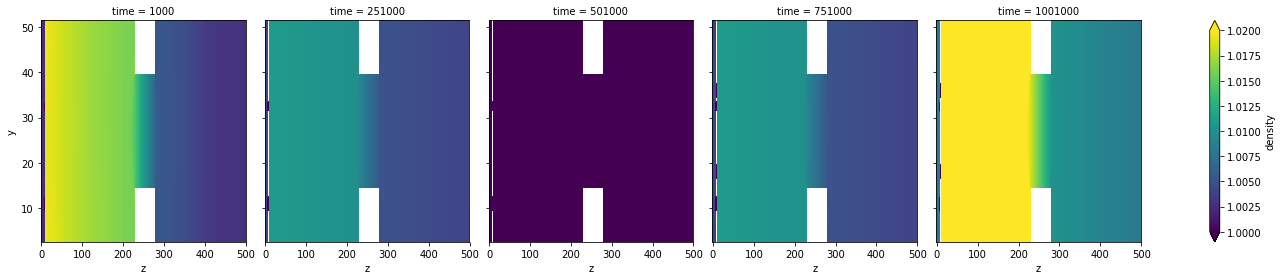

In [17]:
ds_re5pe1['density'].isel(time=[0, 50, 100, 150, 200]).isel(x=halfx_re5).plot(col='time', figsize=[20, 4], vmin=1.0, vmax=1.02)

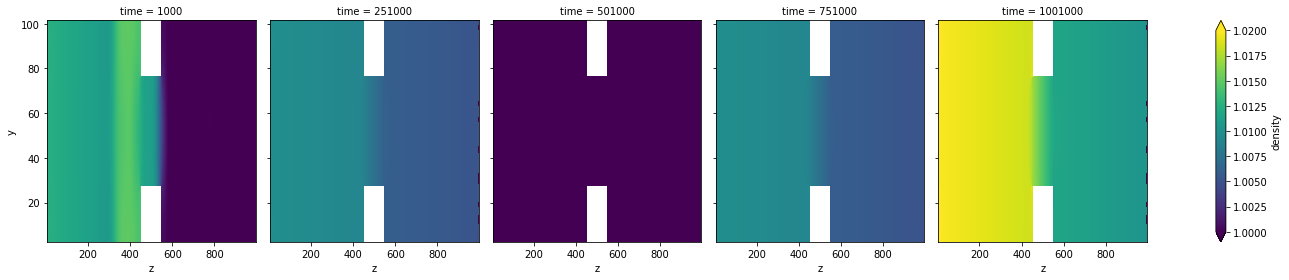

In [18]:
ds_re10pe1['density'].isel(time=[0, 50, 100, 150, 200]).isel(x=halfx_re10).plot(col='time', figsize=[20, 4], vmin=1.0, vmax=1.02)

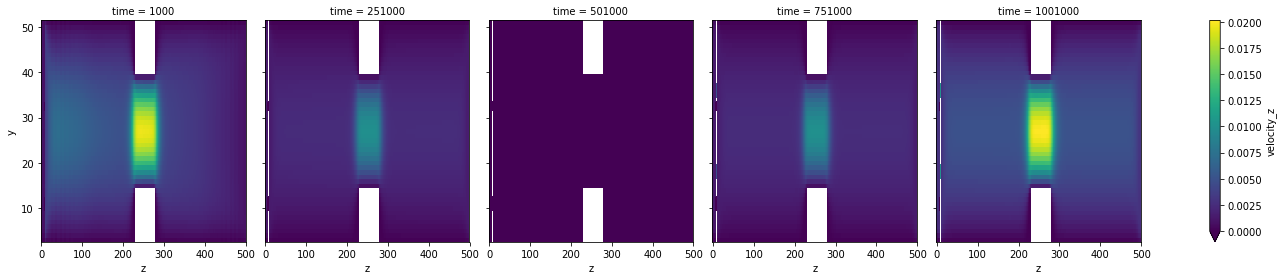

In [19]:
ds_re5pe1['velocity_z'].isel(time=[0, 50, 100, 150, 200]).isel(x=halfx_re5).plot(col='time', figsize=[20, 4], vmin=0)

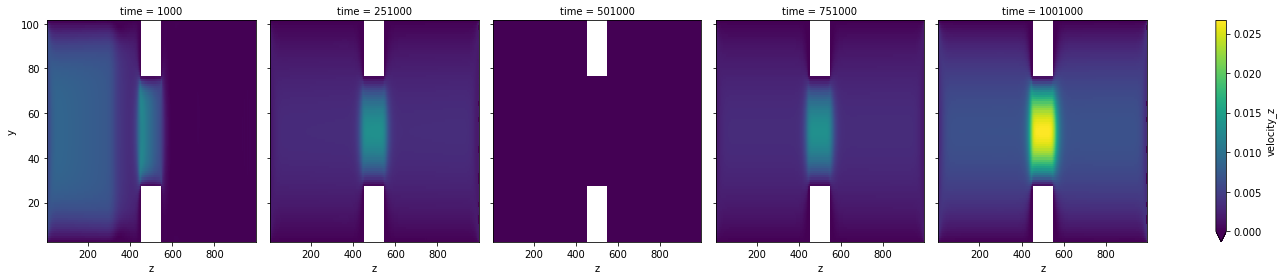

In [20]:
ds_re10pe1['velocity_z'].isel(time=[0, 50, 100, 150, 200]).isel(x=halfx_re10).plot(col='time', figsize=[20, 4], vmin=0)

### Drug field single-step y-z

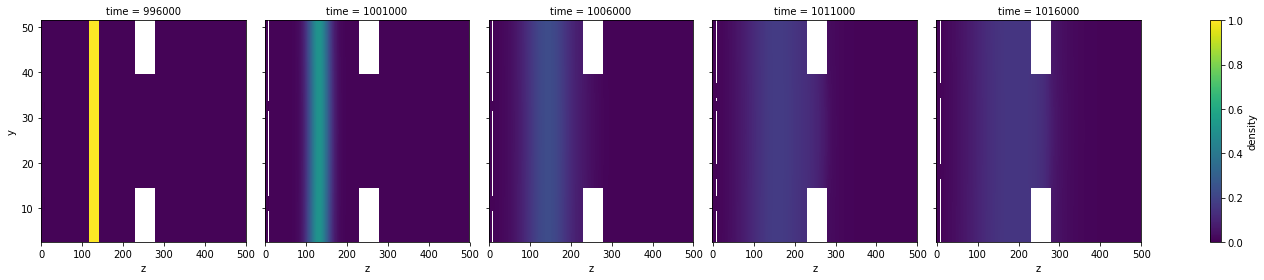

In [21]:
drug_re5pe1.isel(time=[199, 200, 201, 202, 203]).isel(x=halfx_re5).plot(col='time', figsize=[20, 4])

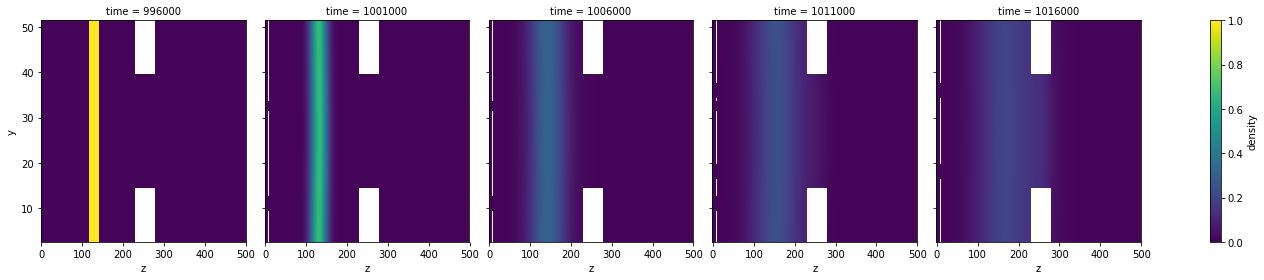

In [22]:
drug_re5pe3.isel(time=[199, 200, 201, 202, 203]).isel(x=halfx_re5).plot(col='time', figsize=[20, 4])

In [23]:
# drug_re10pe1.isel(time=[199, 200, 201, 202, 203]).isel(x=halfx_re10).plot(col='time', figsize=[20, 4])

## Animation y-z plot

# Plot stream line

In [24]:
ds_slice_yz = ds_re5pe1.isel(time=210, x=halfx_re5)
ds_slice_yz

<xarray.Dataset>
Dimensions:     (y: 49, z: 492)
Coordinates:
    x           int64 27
  * y           (y) int64 3 4 5 6 7 8 9 10 11 12 ... 43 44 45 46 47 48 49 50 51
  * z           (z) int64 1 6 7 8 9 10 11 12 ... 489 490 491 492 493 494 495 498
    time        int64 1051000
Data variables:
    density     (y, z) float32 dask.array<shape=(49, 492), chunksize=(49, 492)>
    velocity_x  (y, z) float32 dask.array<shape=(49, 492), chunksize=(49, 492)>
    velocity_y  (y, z) float32 dask.array<shape=(49, 492), chunksize=(49, 492)>
    velocity_z  (y, z) float32 dask.array<shape=(49, 492), chunksize=(49, 492)>

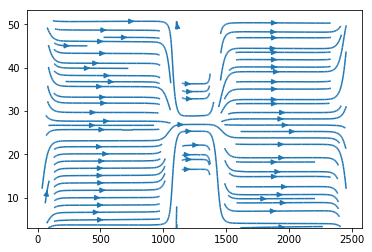

In [25]:
plt.streamplot(ds_slice_yz['z'].values, ds_slice_yz['y'].values, 
               ds_slice_yz['velocity_z'].values, ds_slice_yz['velocity_y'].values)

# Integral of drug density

## Identify the narrowing region

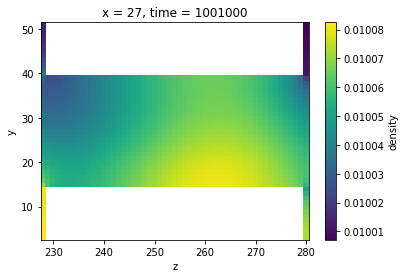

In [26]:
drug_re5pe1.sel(z=slice(228, 280)).isel(x=halfx_re5, time=200).plot()

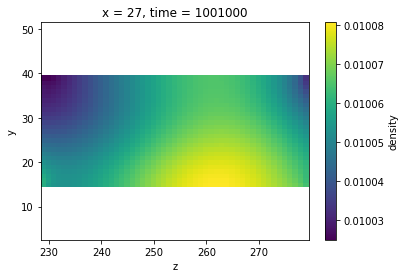

In [27]:
drug_re5pe1.sel(z=slice(229, 279)).isel(x=halfx_re5, time=200).plot()

In [28]:
# drug_re10pe1.sel(z=slice(449, 551)).isel(x=halfx_re10, time=200).plot()

## Integrate

In [29]:
with ProgressBar():
    integral_re5pe1 = drug_re5pe1.sel(z=slice(229, 279)).sum(dim=['x', 'y', 'z']).compute()

[########################################] | 100% Completed |  6.6s


In [30]:
with ProgressBar():
    integral_re5pe3 = drug_re5pe3.sel(z=slice(229, 279)).sum(dim=['x', 'y', 'z']).compute()

[########################################] | 100% Completed |  9.8s


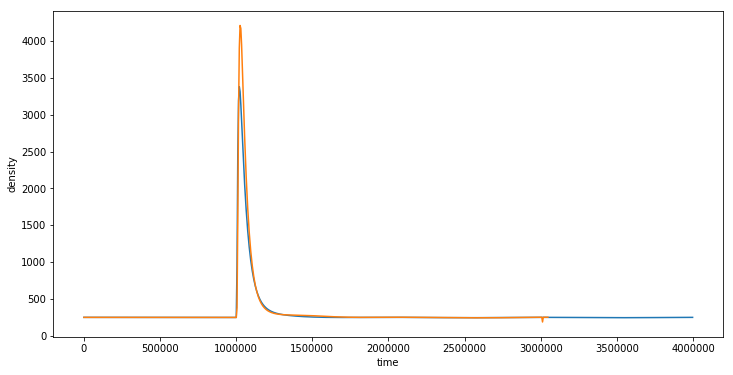

In [31]:
integral_re5pe1.plot(figsize=[12, 6])
integral_re5pe3.plot()

# Drug profile evolution

In [32]:
with ProgressBar():
    profile_re5pe1 = drug_re5pe1.isel(time=210).mean(dim=['x', 'y']).compute()

[########################################] | 100% Completed |  0.1s


/n/home03/zhuangjw/miniconda_new/envs/vtki/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


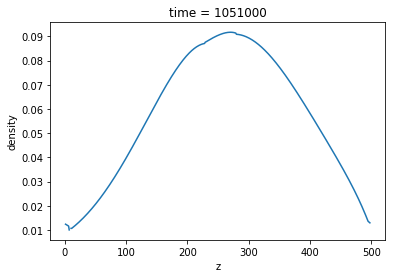

In [33]:
profile_re5pe1.plot()

In [34]:
with ProgressBar():
    profile_2d_re5pe1 = drug_re5pe1.sum(dim=['x', 'y']).compute()

[########################################] | 100% Completed |  9.0s


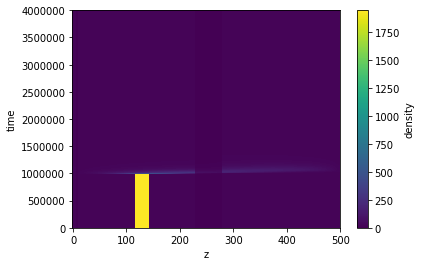

In [35]:
profile_2d_re5pe1.plot()

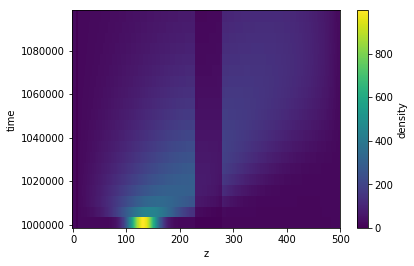

In [36]:
profile_2d_re5pe1.isel(time=slice(200, 220)).plot()

# Schlierin vizualization

# x-z cross section

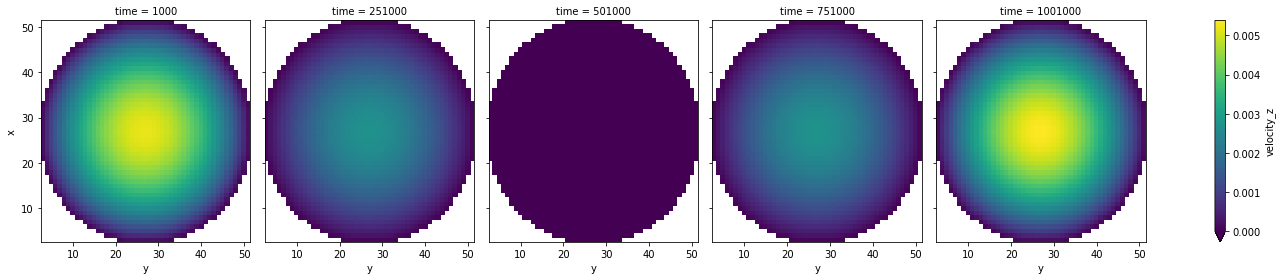

In [37]:
ds_re5pe1['velocity_z'].isel(time=[0, 50, 100, 150, 200]).isel(z=200).plot(col='time', figsize=[20, 4], vmin=0)

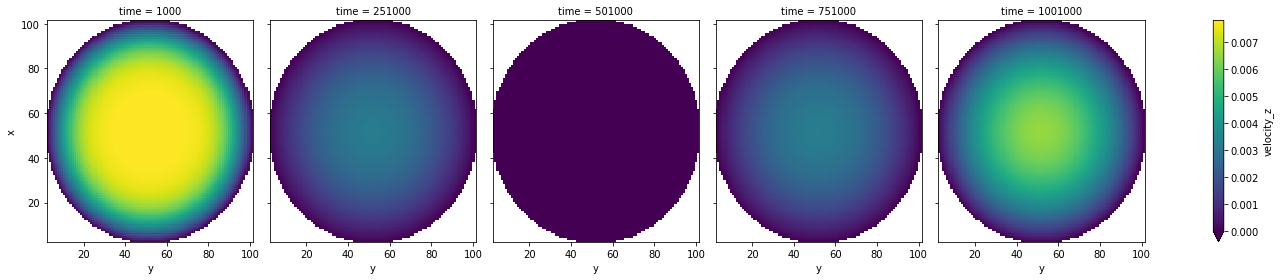

In [38]:
ds_re10pe1['velocity_z'].isel(time=[0, 50, 100, 150, 200]).isel(z=200).plot(col='time', figsize=[20, 4], vmin=0)

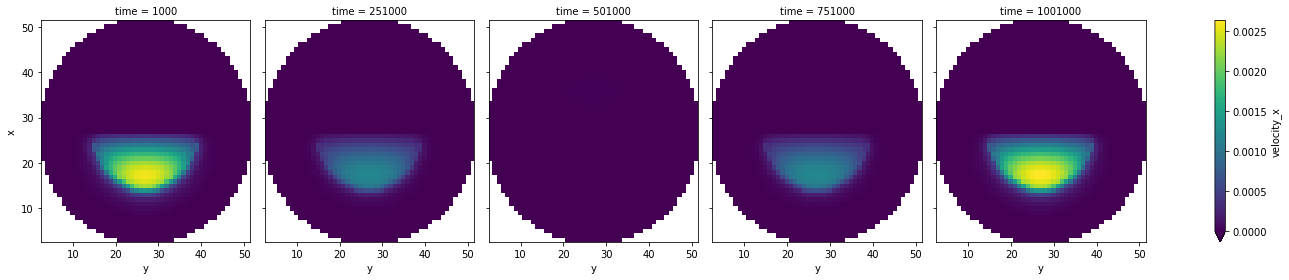

In [39]:
ds_re5pe1['velocity_x'].isel(time=[0, 50, 100, 150, 200]).isel(z=223).plot(col='time', figsize=[20, 4], vmin=0)

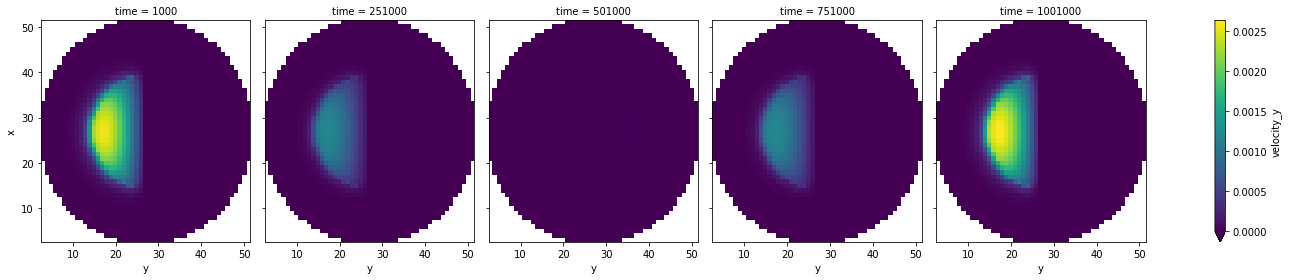

In [40]:
ds_re5pe1['velocity_y'].isel(time=[0, 50, 100, 150, 200]).isel(z=223).plot(col='time', figsize=[20, 4], vmin=0)

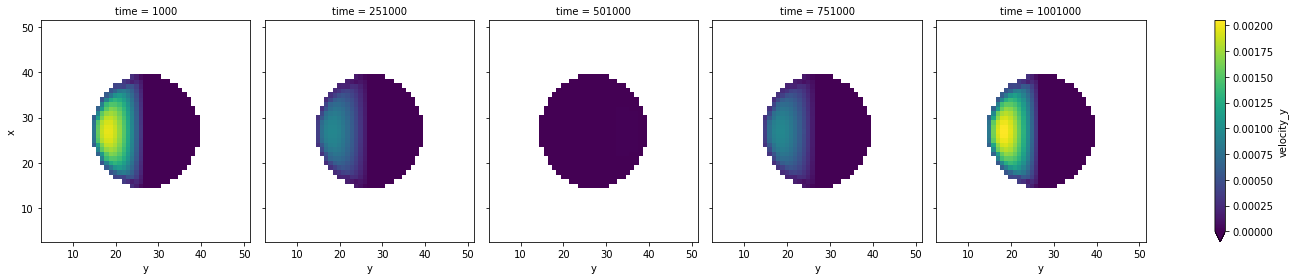

In [41]:
ds_re5pe1['velocity_y'].isel(time=[0, 50, 100, 150, 200]).isel(z=224).plot(col='time', figsize=[20, 4], vmin=0)

In [42]:
ds_slice_xy = ds_re5pe1.isel(time=200, z=220)
ds_slice_xy

<xarray.Dataset>
Dimensions:     (x: 49, y: 49)
Coordinates:
  * x           (x) int64 3 4 5 6 7 8 9 10 11 12 ... 43 44 45 46 47 48 49 50 51
  * y           (y) int64 3 4 5 6 7 8 9 10 11 12 ... 43 44 45 46 47 48 49 50 51
    z           int64 225
    time        int64 1001000
Data variables:
    density     (x, y) float32 dask.array<shape=(49, 49), chunksize=(49, 49)>
    velocity_x  (x, y) float32 dask.array<shape=(49, 49), chunksize=(49, 49)>
    velocity_y  (x, y) float32 dask.array<shape=(49, 49), chunksize=(49, 49)>
    velocity_z  (x, y) float32 dask.array<shape=(49, 49), chunksize=(49, 49)>

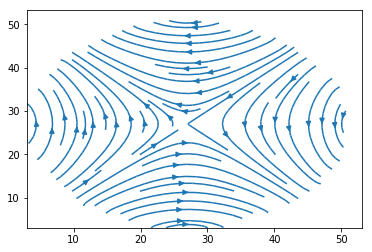

In [43]:
plt.streamplot(ds_slice_xy['x'].values, ds_slice_xy['y'].values, 
               ds_slice_xy['velocity_x'].values, ds_slice_xy['velocity_y'].values)